# Activity 1.3 : Regularization

**Name:** Tacsay, Marie Emmanuelle T.
<br> **Section:** CPE32S8
<br> **Instructor:** Engr. Roman Richard

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [65]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [66]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [67]:
x_train[0].shape

(28, 28)

Check the sample train data

In [68]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [69]:
y_train[333]

8

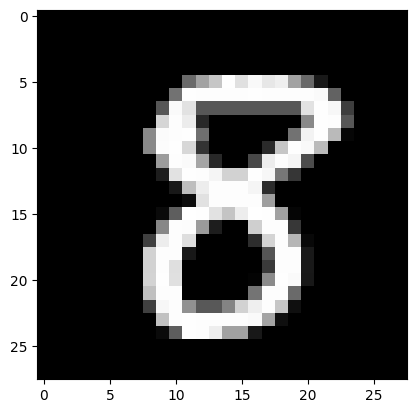

In [70]:
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [71]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [72]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [73]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [74]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [75]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [76]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.5113 - accuracy: 0.8457 - val_loss: 0.1999 - val_accuracy: 0.9377
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2530 - accuracy: 0.9253 - val_loss: 0.1531 - val_accuracy: 0.9519
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1980 - accuracy: 0.9415 - val_loss: 0.1286 - val_accuracy: 0.9622
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1701 - accuracy: 0.9495 - val_loss: 0.1160 - val_accuracy: 0.9665
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1541 - accuracy: 0.9533 - val_loss: 0.1048 - val_accuracy: 0.9686
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1421 - accuracy: 0.9574 - val_loss: 0.1042 - val_accuracy: 0.9689
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1339 - accuracy: 0.9597 - val_loss: 0.1069 - val_accuracy: 0.9696
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [77]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10858245939016342
Test accuracy: 0.9761000275611877


## **Interpret the result**

**Answer:** The accuracy and loss of the test data are 9.75% and 97.62%, respectively. This could mean that the model accuratley calssify the images based on the data that were gathered since it gives a 95% above percentage when it comes to the test data. Also, the model gained an apprximate of 10% of loss percentage or value while performing calssification on test data. This mean that the model is gaining a low percentage of data loss that could be an implication that the model is learning through the data being processed.

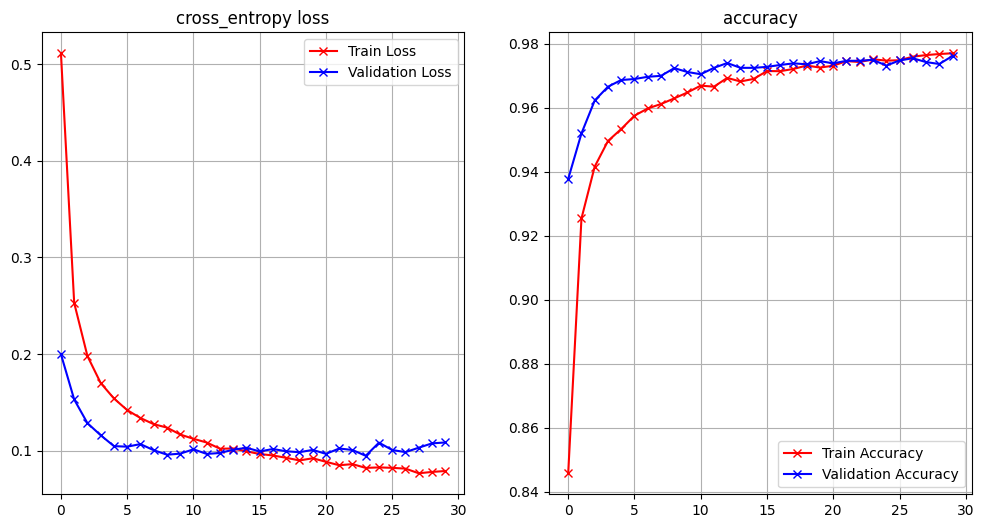

In [78]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

## **Interpret the result**

**Answer:** The photo above shows the visualization on how the accuracy and lost value or percentage looks like. Through this graph, the percentage of both the accuracy and loss values were visualized and the changes it took were also present in the graph. The changes over time would be a big help in determining the model's performance when it comes to handling images and classifying these data. Both performance metrics shows a good result which leads to showing a better perfromance of the model in classifying images. Both the 2 metrics shows a curve which means significant changes occurred such as the model's ability to correctly predict the images.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [92]:
from keras import regularizers
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [93]:
#model1
model1 = Sequential()
model1.add(Dense(400, activation='relu', input_shape=(784,)))
model1.add(Dropout(0.4))
model1.add(Dense(300, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(10, activation='softmax'))

In [94]:
learning_rate = .001
model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history = model1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.3325 - accuracy: 0.8985 - val_loss: 0.1243 - val_accuracy: 0.9609
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1545 - accuracy: 0.9531 - val_loss: 0.0940 - val_accuracy: 0.9711
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1208 - accuracy: 0.9639 - val_loss: 0.0830 - val_accuracy: 0.9739
Epoch 4/20
469/469 [==============================] - 7s 16ms/step - loss: 0.1014 - accuracy: 0.9696 - val_loss: 0.0751 - val_accuracy: 0.9784
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0859 - accuracy: 0.9748 - val_loss: 0.0776 - val_accuracy: 0.9777
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0811 - accuracy: 0.9760 - val_loss: 0.0697 - val_accuracy: 0.9801
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0735 - accuracy: 0.9779 - val_loss: 0.0763 - val_accuracy: 0.9787

In [95]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07271020859479904
Test accuracy: 0.9843999743461609


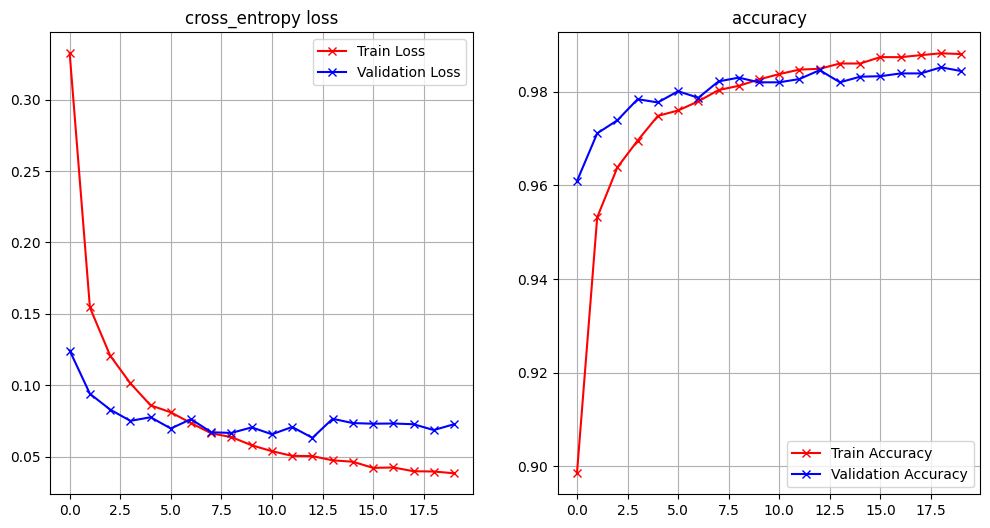

In [96]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

**Analysis:** The photo above shows the graph of the loss and accuracy percentage for the performance of the created model. It shows the visualization of the gained accuracy and loss percentage which are 7.27% and 98.44%, respectively. The graph above shows the curves of both train and validation howevr the validation loss and accuracy seems to oscillate as time progress and model process the data in which doesn't show a curve like line. This means that the model may be not learning at all. This would be a big disadvantage in achieving a high accuracy rate perfromance especilly in dealing image classifications. With this, the model should be modified and tested in order to know if this would be a good model in image classification.

In [97]:
#model2
model2 = Sequential()
model2.add(Dense(300, activation='relu', input_shape=(784,)))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(400, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(400, activation='sigmoid'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(400, kernel_regularizer = regularizers.l2(0.01),
                activity_regularizer = regularizers.l1(0.01),
                activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(Dense(10, activation='softmax'))

In [98]:
learning_rate = .001
earlystop = EarlyStopping(monitor='val_accuracy', patience=5)
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 25
history = model2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/25
469/469 [==============================] - 17s 29ms/step - loss: 2.3542 - accuracy: 0.8515 - val_loss: 0.6748 - val_accuracy: 0.9515
Epoch 2/25
469/469 [==============================] - 12s 26ms/step - loss: 0.6287 - accuracy: 0.9256 - val_loss: 0.4430 - val_accuracy: 0.9586
Epoch 3/25
469/469 [==============================] - 12s 26ms/step - loss: 0.4543 - accuracy: 0.9391 - val_loss: 0.3353 - val_accuracy: 0.9633
Epoch 4/25
469/469 [==============================] - 12s 26ms/step - loss: 0.3782 - accuracy: 0.9456 - val_loss: 0.2734 - val_accuracy: 0.9684
Epoch 5/25
469/469 [==============================] - 12s 26ms/step - loss: 0.3295 - accuracy: 0.9513 - val_loss: 0.2488 - val_accuracy: 0.9691
Epoch 6/25
469/469 [==============================] - 12s 26ms/step - loss: 0.2965 - accuracy: 0.9548 - val_loss: 0.2250 - val_accuracy: 0.9710
Epoch 7/25
469/469 [==============================] - 12s 26ms/step - loss: 0.2808 - accuracy: 0.9561 - val_loss: 0.2029 - val_accuracy:

In [99]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11972175538539886
Test accuracy: 0.9833999872207642


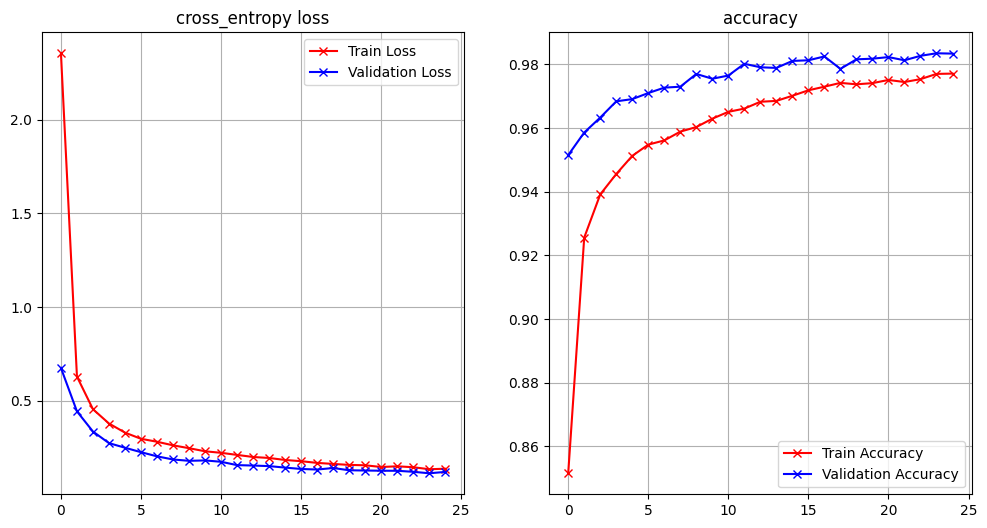

In [100]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

**Analysis:** The graph above shows how the model perform in terms of processing and classifying data images. The model in this section has multiple layers and functions which can be a good comparison factor for the previous model created. As it has multiple functions or layers, the model shows a kind of perfromance which can be seen through its graph. Based on the graph above, both the accuracy and loss shows a curve-like graph especially in terms of processing training data but when it comes to the test data they show differences. For the loss percentage in test data, it shows a almost the same curve just like the train data. This would indicate that the model process and classifiy most of the data correctly. But when it comes to the accuracy percentage in the test data, there is a part of the curve that has corner which means it oscillate in the first part of the model's progress. This could be an indication that the model process that data, with the help of the functions, created some changes resulted to this kind of graph. Overall the model shows a good perfromance in terms of classifying the data given that it has multiple layers and function. Also, this model used different optimizer which is Adam.The model achieved a 11.97% and 98.34% of test loss and test accuracy percentage or value, repectively.

## **Confusion Matrix**

In [101]:
#model1
from sklearn.metrics import confusion_matrix
pred = model1.predict(x_test)
pred = np.argmax(pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)

313/313 [==============================] - 1s 3ms/step


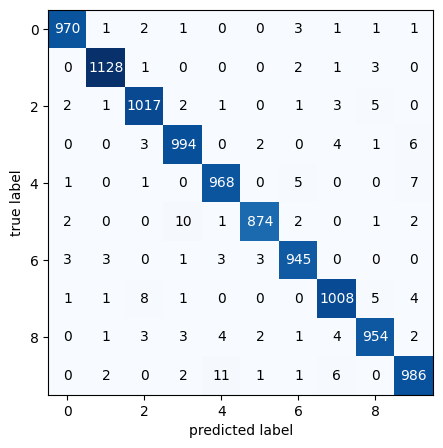

In [102]:
#model1
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

**Analysis:** The photo above shows the confusion matrix of the model. Based on the confusion matrix, there the values or images of that were being classified was 0,2,4,6,8. Reading from the predicted label against the true label, there are images that the model accuractely classified because of the 0 number of images classified. However, there are still images that the model failed to classify correctly since there are still numbers (highest gained is 11) of images that were incorrectly classified by the model.

In [103]:
#model2
from sklearn.metrics import confusion_matrix
pred = model2.predict(x_test)
pred = np.argmax(pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)

313/313 [==============================] - 1s 4ms/step


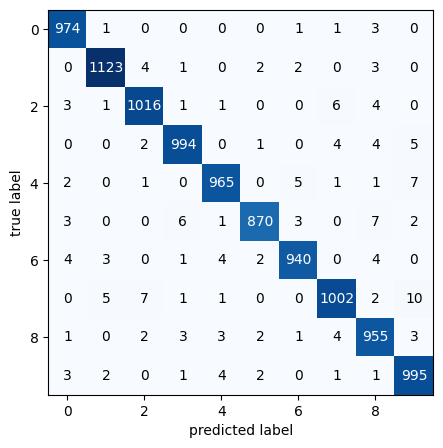

In [104]:
#model2
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

**Analysis:** The photo above shows the confusion matrix of the model 2. According to this confusion matrix the model did a good perfromance in terms of classifying the data images. Aside from the accuracy and loss percentage scores, the confusion matrix also shows and visualize the nunbers of classified imaged of the model. Also, it describes how many does the model classify correctly images when it will be read from the predicted label agains the true label. Just like the confusion matrix above, model2 also has images that were incorrectly classified which is shown or proved by the numbers (white tiles) in the confusion matrix.

**How many parameters does your model have? How does it compare with the previous model?**
<br> **Answer:** Model1 compose of 3 parameters in terms of compiling the model which is also the same as the model previously used before model1. Hwoever they both generated different accuracy and loss percentage. Model1 achieved and approximate of 98% and 7% of accuracy and loss percentage, respectively. While the previous model generated a percentage of 97.61% and 10.85% accuracy and loss percentage. This means that the model1 performed better than the previous model. Also the droptout function of the model1 is 0.4 which means that it will drop neurons which is double the rate when it comes to the previous model. In addition, both the models have tha curve-like graph in the accuracy and loss values of training dataset. However when the model used the test data in order to validate the two metrics, the graph oscillates as the model makes progress. Oscillation of the graph could be mean that the model is not learning or the data that are being processed left an impact on the model's results. Also, the number of units of the model1 are differnt which are 300 and 400, respectively.

**Comparison of model1 and model2:**
<br> **Answer:** The two models show good performance when it comes to processing and classifying data images. model1 and model2 show differences when it comes to their results, hidden layers, graphs and confusion matrix. Model1 has only 3 layers as well as the input layer is 400 while the other layer is only 300. And the activation function used by model1 is only relu. When compared to model2, there are multiple layers that compose this model. The number of units are ranging from 400-500 and the activation functions used are relu and sigmoid. There are also kernel and activity regularizer which used L1 and L2 as regularizer. In addition, the accuracy percentage gained by both models doesn't have much differnce but the loss percentage of these models shows differences which the model2 is less than 3 compared to model1 (11% for model2 and 7% for model1). Also, both models used diiferent optimizers, model1 used RMSprop while model2 used Adam, which in this case have cause effect but it's to minimal to see the differences. The graphs of their perfromance metrics are also not the same because the graph of the model1 both the train and test of both performance metrics intersects and shows a little oscillation in the curve. However, the graph of the model2 shows curve in the loss percentage graph which is a good sign but the accuracy percentage graph has also a little oscillation as the model progress. Lastly, the confusion matrix of the models also shows difference. If one would look to both of their confusion matrix, the confusion matrix of model1 has the most incorrectly classified number of images which is 11 compared to the confusion matrix of model2. Also, the number of incorrect prediction of model2 is less compared to the number of wrong predictions of model1. Overall, these models possess different characteristics for they both have different hidden layers which work on the process and perfromance of the models resulting to different results and scores.

# **Conclusion**

The hidden layers of each model created affects the model's perfromance in processing and classifying the data being entered in the model. The results gained by the model created in this activity serves as the evident on how model perform using data images. Using the different parameters for the hidden layers as well as optimizers would be a good factor for comparing which is better to use and would generate good results. Regularization techniques are used in order for the data not to be overfit which could be known through the curve-like graphs. Regularization is a technique that would modify the perfromance of the model through different functions in order to modify or create changes to the learning algotithm of the model, this would make the model perform well while classifying the data. The results that have been generated by the 2 different models shows a good performance because of the modifications, functions and diofferent parameters that have been changed and added. This would mean that the model is good in classifying images and using regularization made the model perform well with the data. Results such as approximate of 7% to 11% in terms of test loss percentage as well as an approximate of 98% to 99% of test accuracy percentage evidently shows how well the model creted is good in terms of image and classifying them accuractely. Overall, this activity introduced us to the new concept in the field of deep learning. This concept would help us to understand and how we can create and enhance the model we could make. Furthermore, there are alos new functions that we encountered n this activity which is the Dropout() function. This is one of the regularization techniques which randomly drops nerons or layers in order to prevent overfitting of data and generate a better result. With these learnings, creating and modifying own model would be easier and enhancing the model would be possible for the concepts introduced in this activity proved to be a good way to modify and improve a model.

#### ***“I affirm that I have not given or received any unauthorized help on this exam, and that this work is my own.”***

Colab Link : https://colab.research.google.com/drive/1fviuQcf9YiUkg6vH6kZb2s3YFwb9x2uG?usp=sharing